In [1]:
import matplotlib.pyplot as plt
import pyvista as pv
import numpy as np
import json
import glob

import os, sys, time
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_PyVista import *

In [2]:
folder='/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/'
RunTest='Kos_T0_P3_25x25_1/'
RunTest='Kos_Sig_P3_25x25_2.5/'
RunTest = 'TPV_T0_P3_25x25_1/'



TimeStep = 9400
filename= 'step-{TimeStep:04d}.vts'.format(TimeStep=TimeStep)
Stressfilename= 'Sigma-Aligned-step-{TimeStep:04d}.vtu'.format(TimeStep=TimeStep)
JSONfilename= 'step-{TimeStep:04d}_wavefield.json'.format(TimeStep=TimeStep)
filename

'step-9400.vts'

In [3]:
print(sorted(glob(folder+RunTest+'step-*.vts')))

['/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/TPV_T0_P3_25x25_1/step-9400.vts']


In [4]:
OutFolder = folder + RunTest + 'Out/'
CreateFolder(OutFolder)

In [5]:
print(JSONfilename)
with open(folder+RunTest+JSONfilename, 'r') as json_file:
  LoadedJson = json.load(json_file)
LoadedJson['se2wave']

step-9400_wavefield.json


{'time': 3.064618783559,
 'step': 9400,
 'spatial_dimension': 2,
 'mx': 800,
 'my': 800,
 'nx': 2401,
 'ny': 2401,
 'basis_degree': 3,
 'fields': ['u', 'v'],
 'data': {'description': 'wavefield',
  'fields': ['u', 'v'],
  'writer': 'petsc_binary',
  'type': 'Vec',
  'filename': 'step-9400_wavefield.pbin',
  'endian': 'big'},
 'version': [1, 0, 0]}

In [6]:
reader = pv.get_reader(folder+RunTest+Stressfilename)
StressMesh = reader.read()
data = StressMesh.get_array('sigma_xy',preference='point')
StressMesh

UnstructuredGrid (0x14dbeef6b0a0)
  N Cells:	5760000
  N Points:	10240000
  X Bounds:	-1.000e+04, 1.000e+04
  Y Bounds:	-1.000e+04, 1.000e+04
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	3

In [7]:
Xmatrix,Ymatrix,Zmatrix = pyvistaArraySorting(StressMesh, data, 3)

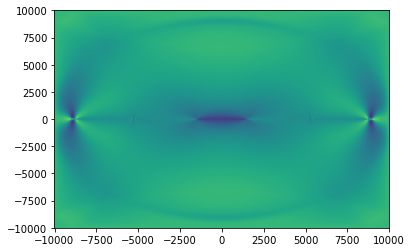

In [8]:
plt.pcolormesh(Xmatrix,Ymatrix,Zmatrix,shading="auto")

In [9]:
SavePickleFile(OutFolder, "StressInAPickle", [Xmatrix,Ymatrix,Zmatrix])

In [14]:
mx=2; nqp=4
TestMatrix = np.zeros((2*nqp,nqp*2))
TestMatrix

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
Test=np.array([1,2,3,4,9,10,11,12,17,18,19,20,25,26,27,28,5,6,7,8,13,14,15,16,21,22,23,24,29,30,31,32])

np.hsplit(Test,mx)

TestMatrix[:4,0:nqp*mx]=np.stack([i.reshape(nqp,-1) for i in np.hsplit(Test,mx)],axis=1).reshape(-1,nqp*mx)
TestMatrix[4:8,0:nqp*mx]=np.stack([i.reshape(nqp,-1) for i in np.hsplit(Test,mx)],axis=1).reshape(-1,nqp*mx)
TestMatrix

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16.],
       [17., 18., 19., 20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29., 30., 31., 32.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16.],
       [17., 18., 19., 20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29., 30., 31., 32.]])